# Import

In [2]:
import pandas as pd
import numpy as np

# Data Loading

In [3]:
path_data = ['../../0raw_data/PRICE_AND_DEMAND_201007_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201008_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201009_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201010_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201011_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201012_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201101_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201102_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201103_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201104_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201105_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201106_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201107_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201108_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201109_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201110_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201111_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201112_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201201_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201202_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201203_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201204_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201205_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201206_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201207_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201208_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201209_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201210_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201211_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201212_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201301_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201302_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201303_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201304_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201305_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201306_NSW1.csv']

In [4]:
# Load data
proccessed_df = pd.DataFrame()
for data in path_data:
    df = pd.read_csv(data, header=0, parse_dates=['SETTLEMENTDATE'], date_format="%y/%d/%m")
    proccessed_df = pd.concat([proccessed_df, df])

# Remove unneccessary data
proccessed_df.set_index(pd.RangeIndex(0, 52608), inplace=True)
proccessed_df.drop(columns=['REGION', 'TOTALDEMAND', 'PERIODTYPE'], inplace=True)
proccessed_df.rename(columns={"RRP": "Price"}, inplace=True)

# proccessed_df["Price"].plot(ylim=(0,200))
# print(proccessed_df["Price"].iloc[10000:10048].mean())
# print(proccessed_df["Price"].iloc[10000:10048].std())

# Replace outliers
# window_std = proccessed_df["Price"].rolling(6).std()
# window_std.plot(ylim=(0,100))
# counter = 0
# for i in range(0,proccessed_df.shape[0]):
#     if window_std.iloc[i] > 40 or window_std.iloc[i] < -40:
#         counter += 1
#         proccessed_df["Price"].iloc[i] = np.nan
# print(counter)
# proccessed_df["Price"].interpolate(method="spline", order=3, inplace=True)


# random_sample = proccessed_df["Price"].dropna().sample(proccessed_df["Price"].isnull().sum(),random_state=0)
# random_sample.index = proccessed_df["Price"][proccessed_df["Price"].isnull()].index
# proccessed_df["Price"].loc[proccessed_df["Price"].isnull()] = random_sample
# proccessed_df = proccessed_df.drop(columns=['z-score'])
# proccessed_df["Price"] = proccessed_df["Price"].div(1000)


# Add net costs
proccessed_df["Price"] = proccessed_df["Price"].div(1000)
# proccessed_df["Price"] = proccessed_df["Price"] + 0.1891


# Save df
proccessed_df.to_csv("../processed_price.csv", sep=',', index=False, encoding='utf-8')

# Data Analysis

<Axes: >

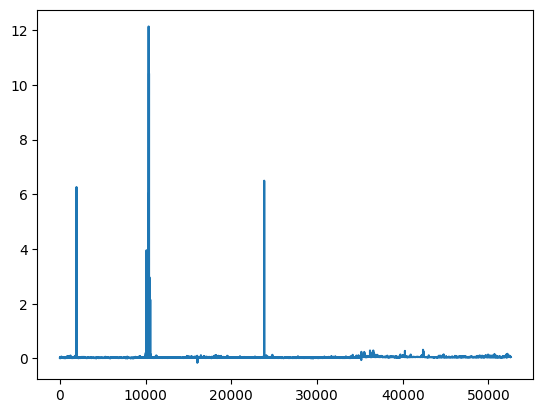

In [5]:
proccessed_df["Price"].plot()

In [6]:
proccessed_df

,SETTLEMENTDATE,Price
0,2010/07/01 00:30:00,0.02936
1,2010/07/01 01:00:00,0.02926
2,2010/07/01 01:30:00,0.03262
3,2010/07/01 02:00:00,0.03189
4,2010/07/01 02:30:00,0.02888
...,...,...
52603,2013/06/30 22:00:00,0.05068
52604,2013/06/30 22:30:00,0.05580
52605,2013/06/30 23:00:00,0.05327
52606,2013/06/30 23:30:00,0.05369


In [8]:
proccessed_df.describe()

,Price
count,52608.000000
mean,0.040497
std,0.149455
min,-0.147030
25%,0.025310
50%,0.030370
75%,0.050600
max,12.136170


## Negative Values

<Axes: >

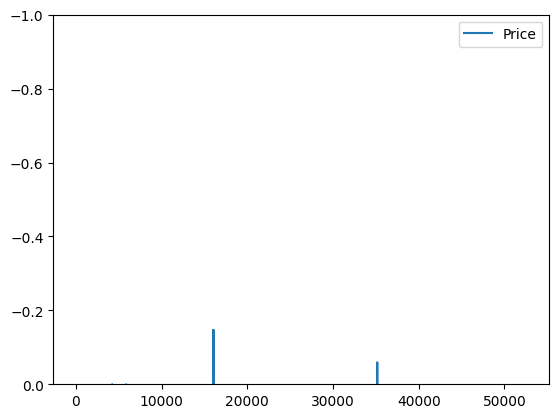

In [9]:
proccessed_df.plot(ylim=(0,-1))

In [10]:
proccessed_df.loc[proccessed_df["Price"]<0]

,SETTLEMENTDATE,Price
4230,2010/09/27 03:30:00,-0.00005
4231,2010/09/27 04:00:00,-0.00005
16010,2011/05/30 13:30:00,-0.14703
16053,2011/05/31 11:00:00,-0.14701
35160,2012/07/02 12:30:00,-0.05928


### 4230 & 4231

<Axes: >

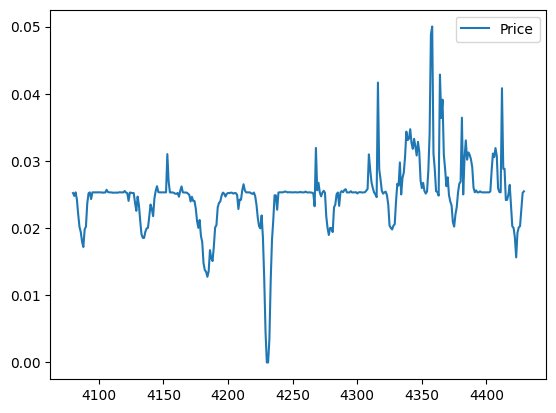

In [11]:
proccessed_df.iloc[4080:4430].plot()

=> probably missing value and floating point error combination

### 16010 & 16053

<Axes: >

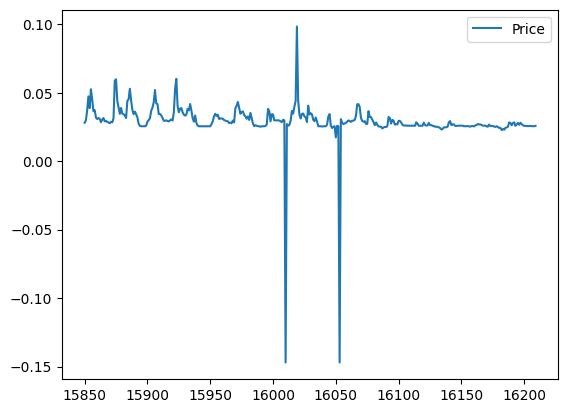

In [12]:
proccessed_df.iloc[15850:16210].plot()

<Axes: >

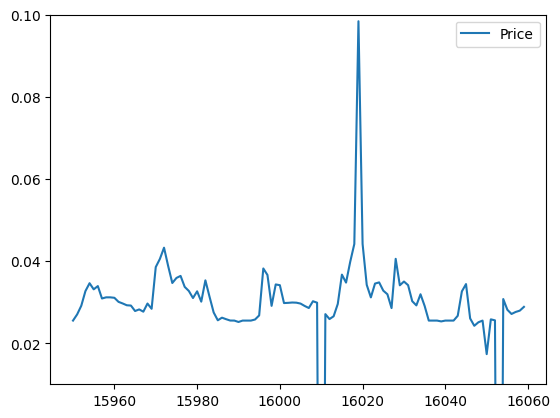

In [13]:
proccessed_df.iloc[15950:16060].plot(ylim=(0.01,0.1))

=> maybe decimal error

### 35160

<Axes: >

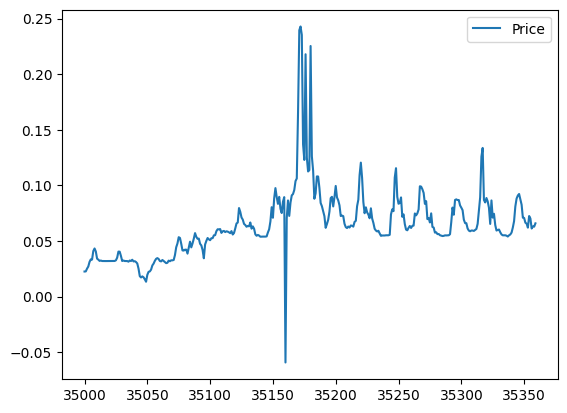

In [14]:
proccessed_df.iloc[35000:35360].plot()

<Axes: >

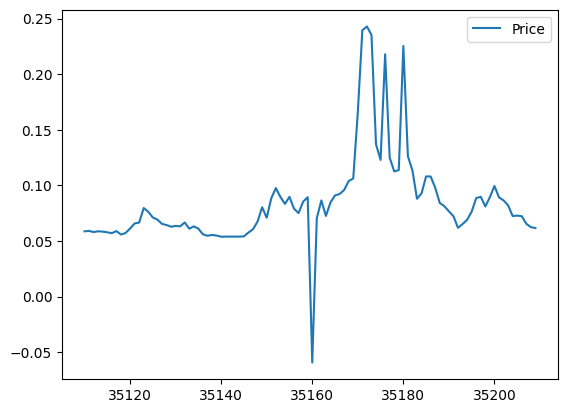

In [15]:
proccessed_df.iloc[35110:35210].plot()

=> sign error

## Extrem Small Values (Close to 0)

In [30]:
proccessed_df.loc[(proccessed_df["Price"]>=0) & (proccessed_df["Price"]<0.01)]

,SETTLEMENTDATE,Price
24,2010/07/01 12:30:00,0.00396
631,2010/07/14 04:00:00,0.00822
632,2010/07/14 04:30:00,0.00903
2169,2010/08/15 05:00:00,0.00994
3991,2010/09/22 04:00:00,0.00924
4229,2010/09/27 03:00:00,0.00452
4232,2010/09/27 04:30:00,0.00346
5860,2010/10/31 02:30:00,0.00798
5861,2010/10/31 03:00:00,0.00296
5862,2010/10/31 03:30:00,0.00334


=> ignore because their influence is only minimal after adding net cost

## Big Values (20 to 50 Cent)

<Axes: >

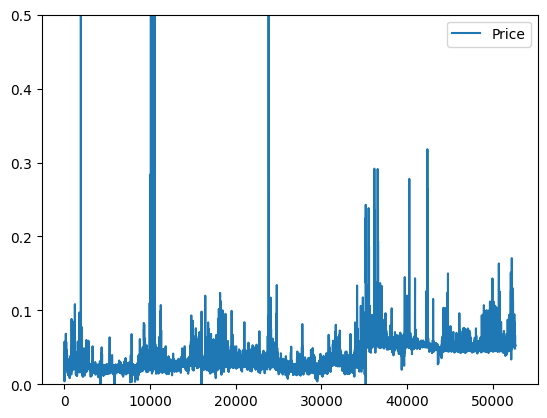

In [29]:
proccessed_df.plot(ylim=(0,0.5))

In [33]:
proccessed_df.loc[(proccessed_df["Price"]>=0.2) & (proccessed_df["Price"]<=0.5)]

,SETTLEMENTDATE,Price
10015,2011/01/25 16:00:00,0.20591
10064,2011/01/26 16:30:00,0.28409
10065,2011/01/26 17:00:00,0.24172
10070,2011/01/26 19:30:00,0.22076
10071,2011/01/26 20:00:00,0.28409
...,...,...
42410,2012/11/30 13:30:00,0.22738
42411,2012/11/30 14:00:00,0.21036
42412,2012/11/30 14:30:00,0.25778
42413,2012/11/30 15:00:00,0.26385


## Extrem Big Values (>50 Cent)

<Axes: >

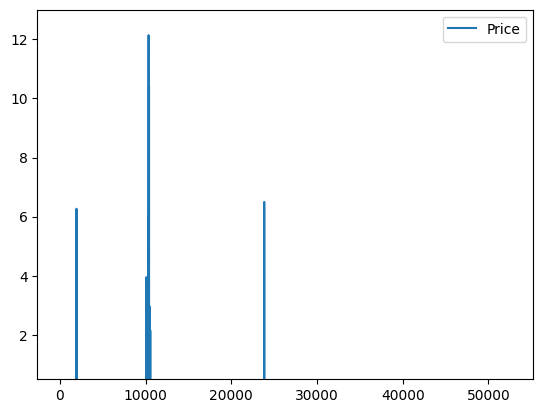

In [37]:
proccessed_df.plot(ylim=(0.5,13))

In [34]:
proccessed_df.loc[proccessed_df["Price"]>0.5]

,SETTLEMENTDATE,Price
1936,2010/08/10 08:30:00,6.26650
1937,2010/08/10 09:00:00,5.73878
10105,2011/01/27 13:00:00,2.60975
10106,2011/01/27 13:30:00,3.95563
10302,2011/01/31 15:30:00,2.20122
10303,2011/01/31 16:00:00,6.01997
10304,2011/01/31 16:30:00,4.42205
10345,2011/02/01 13:00:00,1.46678
10346,2011/02/01 13:30:00,5.03989
10347,2011/02/01 14:00:00,4.93203


### 1936 & 1937

<Axes: >

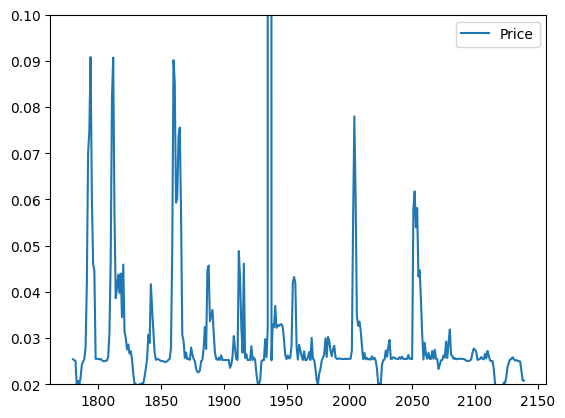

In [45]:
proccessed_df.iloc[1780:2140].plot(ylim=(0.02,0.1))

=> decimal error

### 10105 to 10543

<Axes: >

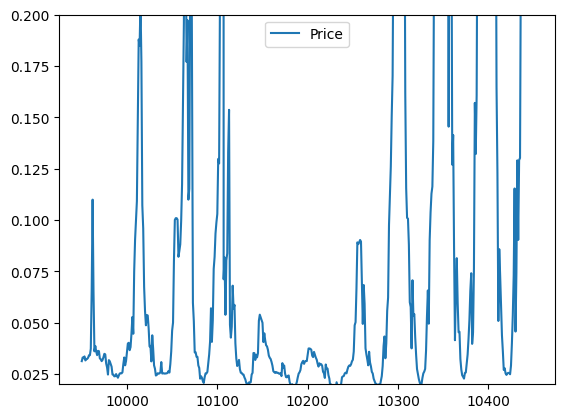

In [48]:
proccessed_df.iloc[9950:10450].plot(ylim=(0.02,0.2))

=> 26.01 Discovery of Cyclone Yasi

=> 02.02 First Hit

=> 03.02 End of Cyclone but heavy rainfall

### 23838

<Axes: >

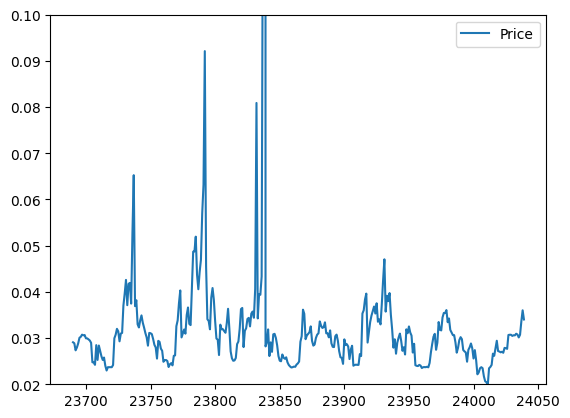

In [50]:
proccessed_df.iloc[23690:24040].plot(ylim=(0.02,0.1))

=> decimal error